Data Set Information:

The estimated relative performance values were estimated by the authors using a linear regression method. See their article (pp 308-313) for more details on how the relative performance values were set.


Attribute Information:

1. vendor name: 30
(adviser, amdahl,apollo, basf, bti, burroughs, c.r.d, cambex, cdc, dec,
dg, formation, four-phase, gould, honeywell, hp, ibm, ipl, magnuson,
microdata, nas, ncr, nixdorf, perkin-elmer, prime, siemens, sperry,
sratus, wang)
2. Model Name: many unique symbols
3. MYCT: machine cycle time in nanoseconds (integer)
4. MMIN: minimum main memory in kilobytes (integer)
5. MMAX: maximum main memory in kilobytes (integer)
6. CACH: cache memory in kilobytes (integer)
7. CHMIN: minimum channels in units (integer)
8. CHMAX: maximum channels in units (integer)
9. PRP: published relative performance (integer)
10. ERP: estimated relative performance from the original article (integer)


Relevant Papers:

Ein-Dor and Feldmesser (CACM 4/87, pp 308-317)

Kibler,D. & Aha,D. (1988). Instance-Based Prediction of Real-Valued Attributes. In Proceedings of the CSCSI (Canadian AI) Conference.
[Web Link]



In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

dat = open('hardware.data','r')

df = pd.read_csv(dat, sep=",")
dat.close()

data = df.copy()
data.drop('vendor name', axis=1, inplace=True)
data.drop('Model Name', axis=1, inplace=True)
data.drop('ERP', axis = 1, inplace=True)

X = data.copy()
X.drop('PRP', axis = 1, inplace=True)
y = data.loc[:,'PRP']
y.columns = 'PRP'


Before split the dataset, i want to make an EDA. First look for NaN values:

In [27]:
data.isnull().sum()


MYCT     0
MMIN     0
MMAX     0
CACH     0
CHMIN    0
CHMAX    0
PRP      0
dtype: int64

In [193]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

train = pd.concat([X_train, y_train], axis=1)
test = pd.concat([X_test, y_test], axis=1)



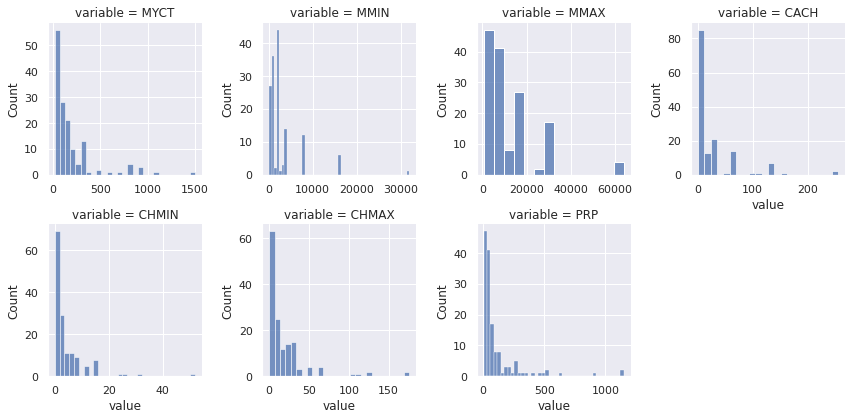

In [34]:

values = pd.melt(train, value_vars = data.columns.to_list())
g = sns.FacetGrid(values, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.histplot, 'value')

MYCT outliers(%) : 8.90
MMIN outliers(%) : 13.01
MMAX outliers(%) : 2.74
CACH outliers(%) : 8.22
CHMIN outliers(%) : 8.22
CHMAX outliers(%) : 8.22
PRP outliers(%) : 12.33


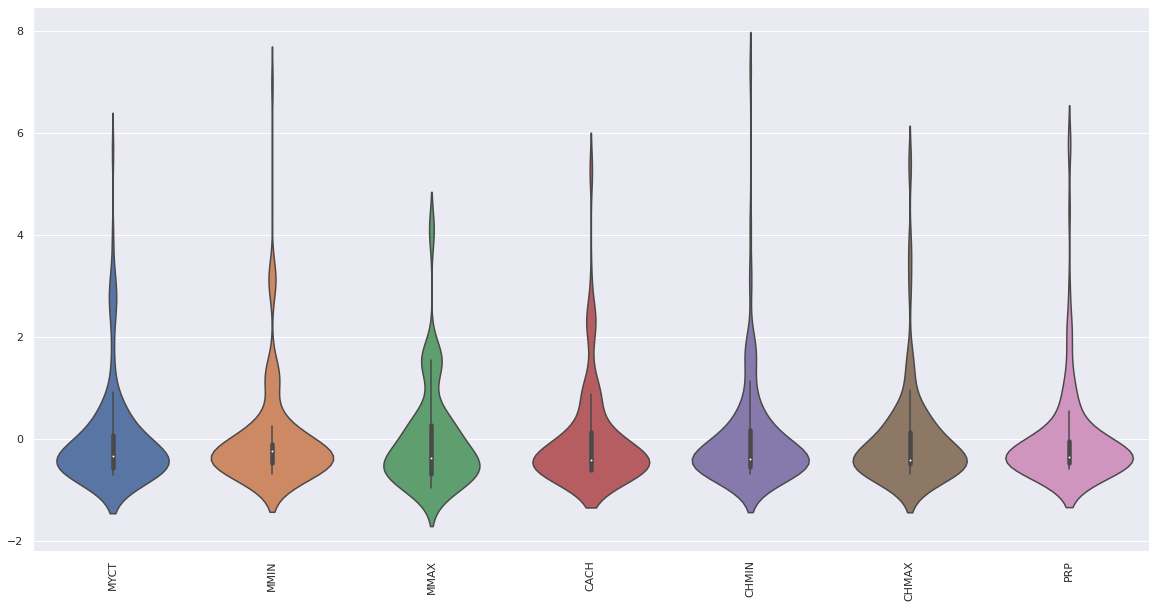

In [9]:
from sklearn.preprocessing import StandardScaler
param = train.copy()
tr_x = StandardScaler()
param_a = tr_x.fit_transform(param)
sns.set(rc={"figure.figsize":(20, 10)})
ax = sns.violinplot(data=param_a )
ax.set_xticklabels(param.columns.to_list(), rotation='vertical')

#Outliers percentage
b = train.copy()
for col in b.columns.to_list():
    q1 = b[col].quantile(q=0.25)
    q3 = b[col].quantile(q=0.75)
    iqr = q3 - q1
    cont = 0
    maxi = q3 + 1.6*iqr
    mini = q1 - 1.6*iqr
    long = len(b[(b[col]>maxi) | (b[col]<mini)][col])
    long = 100*long/len(b)
    print('{0} outliers(%) : {1:.2f}'.format(col,long))
    

<AxesSubplot:>

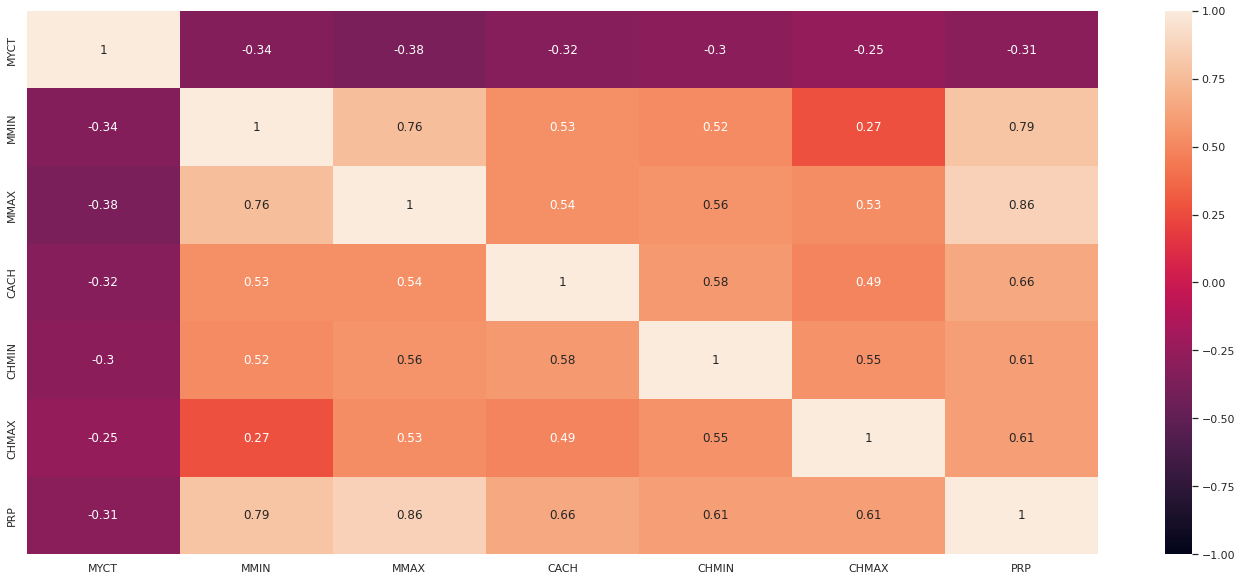

In [22]:
sns.set(rc={"figure.figsize":(24, 10)}) #width=6, height=5
a = data
corr = a.corr('pearson')
sns.heatmap(corr, yticklabels=True, vmin = -1, vmax=1, annot=True)

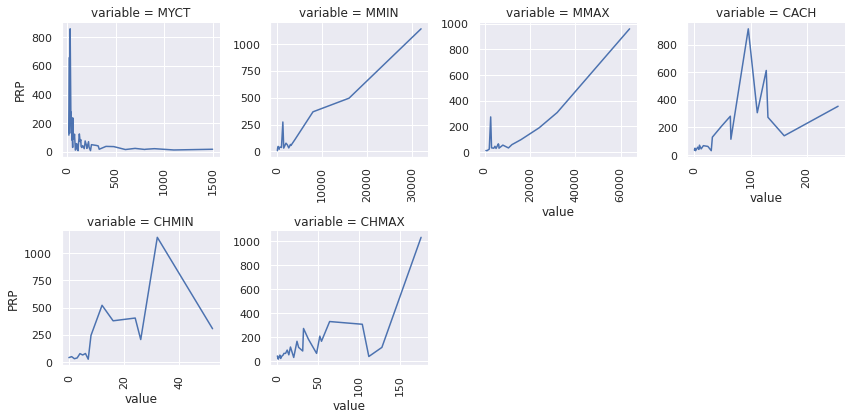

In [28]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)

data_t = train
f = pd.melt(data_t, id_vars=['PRP'], value_vars=data_t.columns.to_list())
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False, height=3)
g = g.map(pairplot, 'value','PRP')

In [117]:
a = train.copy()
col_1 = ['PRP', 'MYCT']
a.loc[:,col_1] = np.log1p(a.loc[:,col_1])

col_2 = ['MMIN']
a.loc[:,col_2] = np.log1p(a.loc[:,col_2])

col_3 = ['CACH', 'CHMAX']
a.loc[:,col_3] = np.log1p(a.loc[:,col_3])

col_4 = ['CHMIN']
a.loc[:,col_4] = np.log1p(a.loc[:,col_4])

train_log = a.copy()

a = test.copy()
col_1 = ['PRP', 'MYCT']
a.loc[:,col_1] = np.log1p(a.loc[:,col_1])

col_2 = ['MMIN']
a.loc[:,col_2] = np.log1p(a.loc[:,col_2])

col_3 = ['CACH', 'CHMAX']
a.loc[:,col_3] = np.log1p(a.loc[:,col_3])

col_4 = ['CHMIN']
a.loc[:,col_4] = np.log1p(a.loc[:,col_4])

test_log  = a.copy()



MYCT outliers(%) : 0.00
MMIN outliers(%) : 6.16
MMAX outliers(%) : 2.74
CACH outliers(%) : 0.00
CHMIN outliers(%) : 0.68
CHMAX outliers(%) : 0.00
PRP outliers(%) : 2.05


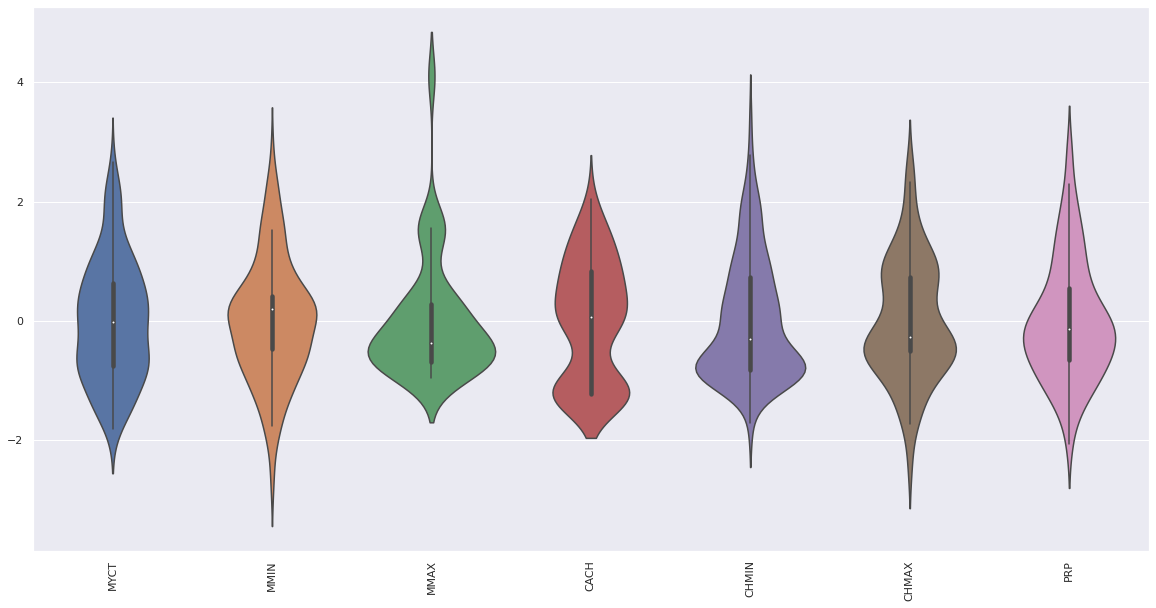

In [18]:
from sklearn.preprocessing import StandardScaler
param = train_log.copy()
tr_x = StandardScaler()
param_a = tr_x.fit_transform(param)
sns.set(rc={"figure.figsize":(20, 10)})
ax = sns.violinplot(data=param_a )
ax.set_xticklabels(param.columns.to_list(), rotation='vertical')

#Outliers percentage
b = train_log.copy()
for col in b.columns.to_list():
    q1 = b[col].quantile(q=0.25)
    q3 = b[col].quantile(q=0.75)
    iqr = q3 - q1
    cont = 0
    maxi = q3 + 1.6*iqr
    mini = q1 - 1.6*iqr
    long = len(b[(b[col]>maxi) | (b[col]<mini)][col])
    long = 100*long/len(b)
    print('{0} outliers(%) : {1:.2f}'.format(col,long))

In [118]:
X_train_log = train_log.copy()
X_train_log = X_train_log.drop('PRP', axis=1)
y_train_log = pd.DataFrame(train_log['PRP'], columns=['PRP'])


X_test_log = test_log.copy()
X_test_log = X_test_log.drop('PRP', axis=1)
y_test_log = pd.DataFrame(test_log['PRP'], columns=['PRP'])


<AxesSubplot:>

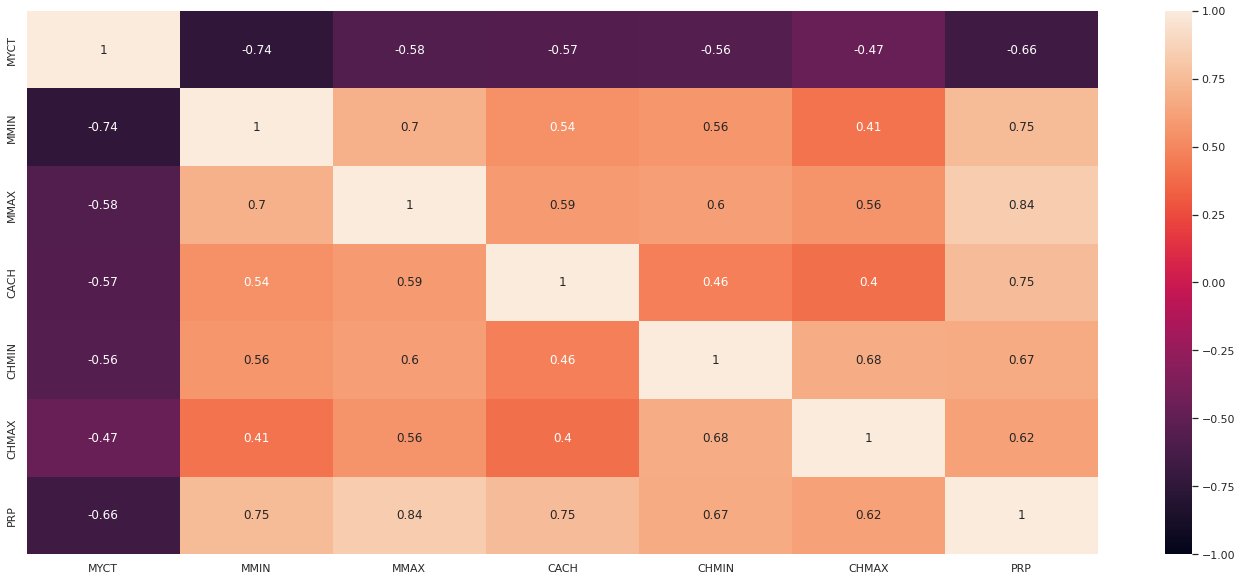

In [42]:
sns.set(rc={"figure.figsize":(24, 10)}) #width=6, height=5
a = train_log
corr = a.corr('pearson')
sns.heatmap(corr, yticklabels=True, vmin = -1, vmax=1, annot=True)

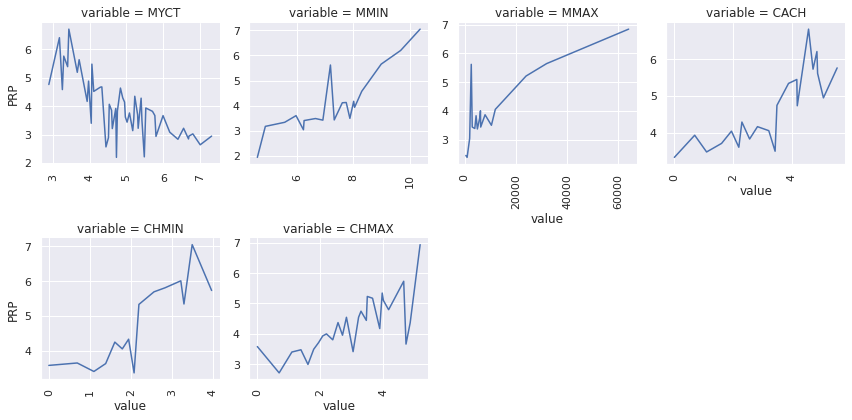

In [30]:
def pairplot(x, y, **kwargs):
    ax = plt.gca()
    ts = pd.DataFrame({'time': x, 'val': y})
    ts = ts.groupby('time').mean()
    ts.plot(ax=ax)
    plt.xticks(rotation=90)

data_t = train_log
f = pd.melt(data_t, id_vars=['PRP'], value_vars=data_t.columns.to_list())
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False, height=3)
g = g.map(pairplot, 'value','PRP')

Finally I apply linear regression

Train accuracy:  0.88
-----------------------------------------------------------
CV accuracy: 0.594 


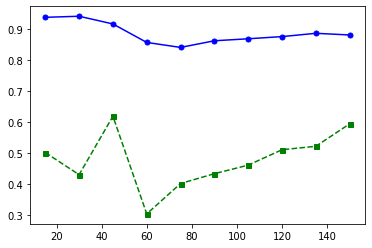

In [145]:
##########################   LINEAR REGRESSION   ##########################################
###########################################################################################

Xtrain = X_train.copy()
Xtest = X_test.copy()
ytrain = y_train.copy()
ytest = y_test.copy()


#PREPROCESING AND MODEL WITH PIPELINE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(Xtrain, ytrain)
ytrain_pred = pipe.predict(Xtrain)
ytest_pred = pipe.predict(Xtest)


#SCORING
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
scores = cross_val_score(estimator=pipe, X=Xtrain, y=ytrain, cv=10, n_jobs=1)

print("Train accuracy:  {0:.2f}".format(r2_score(ytrain, ytrain_pred)))
print('-----------------------------------------------------------')
print('CV accuracy: %.3f ' % (np.mean(scores)))

#LEARNING CURVE
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=pipe, X=Xtrain, y=ytrain, train_sizes=np.linspace(0.1, 1.0, 10),
cv=10,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5, label='Training accuracy')
plt.plot(train_sizes, test_mean, color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')

It's a bad score. I apply Lasso. First I check the best value for alpha with the validation curve, using an arbitrary alpha value:

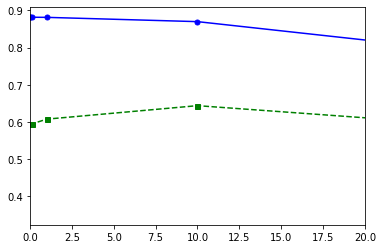

In [162]:
####################################   LASSO   ############################################
###########################################################################################
Xtrain = X_train.copy()
Xtest = X_test.copy()
ytrain = y_train.copy()
ytest = y_test.copy()

#VALIDATION CURVE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve

pipe = make_pipeline(StandardScaler(), Lasso())
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe, X=Xtrain, y=ytrain, param_name='lasso__alpha',
param_range=param_range,
cv=10)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

fig = plt.figure()
fig = plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.xlim(0, 20)
plt.plot(param_range, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')


 Then I run again puttin the best alpha value in the Lasso params

Train accuracy:  0.87
-----------------------------------------------------------
CV accuracy: 0.644 


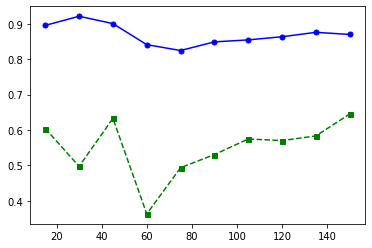

In [163]:
####################################   LASSO   ############################################
###########################################################################################


#PREPROCESING AND MODEL WITH PIPELINE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), Lasso(alpha=10))
pipe.fit(Xtrain, ytrain)
ytrain_pred = pipe.predict(Xtrain)
ytest_pred = pipe.predict(Xtest)


#SCORING
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
scores = cross_val_score(estimator=pipe, X=Xtrain, y=ytrain, cv=10, n_jobs=1)
print("Train accuracy:  {0:.2f}".format(r2_score(ytrain, ytrain_pred)))
print('-----------------------------------------------------------')
print('CV accuracy: %.3f ' % (np.mean(scores)))

#LEARNING CURVE
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe, X=Xtrain, y=ytrain, train_sizes=np.linspace(0.1, 1.0, 10),
cv=10,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5, label='Training accuracy')
plt.plot(train_sizes, test_mean, color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')


Before dealing the overfiting, I prove with log transform in order tho get a better score

Train accuracy:  0.85
-----------------------------------------------------------
CV accuracy: 0.805 


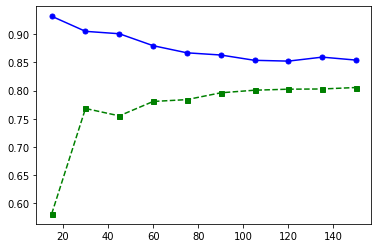

In [149]:
##########################   LINEAR REGRESSION WITH LOG TRANSFORM   ##########################################
###########################################################################################

Xtrain = X_train_log.copy()
Xtest = X_test_log.copy()
ytrain = y_train_log.copy()
ytest = y_test_log.copy()

#PREPROCESING AND MODEL WITH PIPELINE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(Xtrain, ytrain)
ytrain_pred = pipe.predict(Xtrain)
ytest_pred = pipe.predict(Xtest)


#SCORING
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
scores = cross_val_score(estimator=pipe, X=Xtrain, y=ytrain, cv=10, n_jobs=1)
print("Train accuracy:  {0:.2f}".format(r2_score(ytrain, ytrain_pred)))
print('-----------------------------------------------------------')
print('CV accuracy: %.3f ' % (np.mean(scores)))

#LEARNING CURVE
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe, X=Xtrain, y=ytrain, train_sizes=np.linspace(0.1, 1.0, 10),
cv=10,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5, label='Training accuracy')
plt.plot(train_sizes, test_mean, color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')

The overfitting is shrinked. I try to get a better score applying lasso in the same way i did for linear regression without log transform

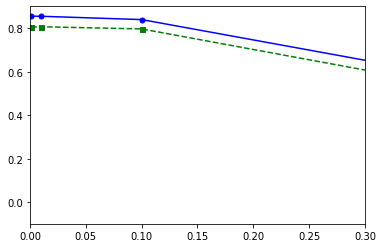

In [166]:
####################################   LASSO WITH LOG TRANSFORM  ############################################
###########################################################################################
Xtrain = X_train_log.copy()
Xtest = X_test_log.copy()
ytrain = y_train_log.copy()
ytest = y_test_log.copy()

#VALIDATION CURVE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import validation_curve

pipe = make_pipeline(StandardScaler(), Lasso())
param_range = [0.001, 0.01, 0.1, 1.0, 10.0, 100.0]
train_scores, test_scores = validation_curve(estimator=pipe, X=Xtrain, y=ytrain, param_name='lasso__alpha',
param_range=param_range,
cv=10)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

fig = plt.figure()
fig = plt.plot(param_range, train_mean, color='blue', marker='o', markersize=5, label='Training accuracy')
plt.xlim(0, 0.3)
plt.plot(param_range, test_mean,color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')


And put the best value for alpha

Train accuracy:  0.84
-----------------------------------------------------------
CV accuracy: 0.796 


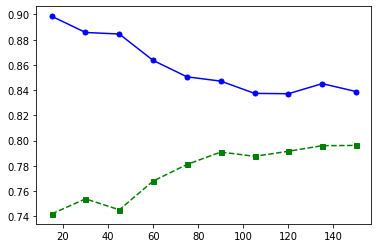

In [167]:

#PREPROCESING AND MODEL WITH PIPELINE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), Lasso(alpha=0.1))
pipe.fit(Xtrain, ytrain)
ytrain_pred = pipe.predict(Xtrain)
ytest_pred = pipe.predict(Xtest)


#SCORING
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
scores = cross_val_score(estimator=pipe, X=Xtrain, y=ytrain, cv=10, n_jobs=1)
print("Train accuracy:  {0:.2f}".format(r2_score(ytrain, ytrain_pred)))
print('-----------------------------------------------------------')
print('CV accuracy: %.3f ' % (np.mean(scores)))

#LEARNING CURVE
from sklearn.model_selection import learning_curve

train_sizes, train_scores, test_scores = learning_curve(estimator=pipe, X=Xtrain, y=ytrain, train_sizes=np.linspace(0.1, 1.0, 10),
cv=10,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5, label='Training accuracy')
plt.plot(train_sizes, test_mean, color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')


The preformance gets worse. It seems the best combination is linear regression with log transform. I try with random forest. First I evaluate the best params combination

In [182]:
##########################   RANDOM FOREST REGRESSOR   ##########################################
###########################################################################################

Xtrain = X_train.copy()
Xtest = X_test.copy()
ytrain = y_train.copy()
ytest = y_test.copy()


#VALIDATION CURVE
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor()
param_grid = {'n_estimators': param_range,'max_depth': [1,2,3,4,5,None], max_features[0.3,0.5,0.8,1]}
gs = GridSearchCV(estimator=forest, param_grid=param_grid, scoring='r2',cv=10,refit=True, n_jobs=-1)
gs = gs.fit(X_train, y_train)
print(gs.best_score_)
print(gs.best_params_)

Train accuracy:  0.98
-----------------------------------------------------------
CV accuracy: 0.837 


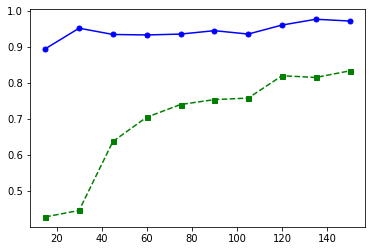

In [194]:
#PREPROCESING AND MODEL
forest = RandomForestRegressor(n_estimators=20, max_depth=None, max_features=0.8)
forest.fit(Xtrain, ytrain)
ytrain_pred = forest.predict(Xtrain)
ytest_pred = forest.predict(Xtest)

#SCORING
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
scores = cross_val_score(estimator=forest, X=Xtrain, y=ytrain, cv=10, n_jobs=1)
print("Train accuracy:  {0:.2f}".format(r2_score(ytrain, ytrain_pred)))
print('-----------------------------------------------------------')
print('CV accuracy: %.3f ' % (np.mean(scores)))

# #LEARNING CURVE
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(estimator=forest, X=Xtrain, y=ytrain, train_sizes=np.linspace(0.1, 1.0, 10),
cv=10,n_jobs=1)
train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_mean,color='blue', marker='o',markersize=5, label='Training accuracy')
plt.plot(train_sizes, test_mean, color='green', linestyle='--',marker='s', markersize=5,label='Validation accuracy')


The preformance gets worse. It seems the best combination is linear regression with log transform. I try with random forest

Finally I check with test data


In [195]:
print('Model Score:  %.2f'%(r2_score(ytest, ytest_pred)))

Model Score:  0.90
